<table width="100%" style="border: none; border-collapse: collapse;">
  <tr>
    <td style="vertical-align: middle; padding: 10px;">
      <h1 style="margin: 0; font-size: 1.5em;">Guía Semana No. 1</h1>
    </td>
    <td style="text-align: right; vertical-align: middle; padding: 10px;">
      <img src="resources_5082025/University_of_Los_Andes_logo.png" width="120" alt="Logo Universidad de los Andes" />
    </td>
  </tr>
</table>
<hr>

Esta guía cubre desde lo básico hasta temas avanzados en:

- Vectores y matrices con NumPy
- Visualización y animación con Matplotlib
- Marcos de referencia simbólicos con SymPy Mechanics
- Transformaciones homogéneas 2D y 3D
- Cinemática directa e inversa de robots (2R)

### Importación de librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import symbols, Matrix, pi, cos, sin, simplify, eye, solve, latex
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting

init_vprinting()

### Manipulacion de vectores y matrices

####  ¿Cómo usar numpy array?

- np.array() para vectores columna
- np.array([$arg_{1}$], [$arg_{2}$]) para matrices
- np.cross() para producto cruz.
- np.dot() para producto punto.

####  Ejemplo básico:

In [3]:
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("Producto punto:", np.dot(v1, v2))
print("Producto cruz:", np.cross(v1, v2))
print("Matriz A:", A)
print("Transpuesta de A:\n", A.T)
print("Inversa de A:\n", np.linalg.inv(A))
print("Multiplicación A @ B:\n", A @ B)

Producto punto: 32
Producto cruz: [-3  6 -3]
Matriz A: [[1 2]
 [3 4]]
Transpuesta de A:
 [[1 3]
 [2 4]]
Inversa de A:
 [[-2.   1. ]
 [ 1.5 -0.5]]
Multiplicación A @ B:
 [[19 22]
 [43 50]]


In [3]:
# seleccion de uno o mas elementos
A[:,0] # Toma todas las filas de la columna 0
A[0,:] # Toma todas las columnas de la fila 0
v1[0] # Accede a la posición No. 0 del vector
v2[-1] # Accede a la posicion No. N del vector de N posiciones
m, n = A.shape # me da el numero de filas (n) y el numero de columnas (m)

> Ejercicio No. 1

In [ ]:
# TODO:
'''
- Implementar una función que reciba una matriz con m filas (constante) y n columnas (cada columna representa un vector),
  y determine si los vectores columna son linealmente independientes.

- Recuerde que el sistema Ax = b tiene solución si y solo si el rango de la matriz de coeficientes A es igual
  al rango de la matriz aumentada [A | b].

- El rango de una matriz puede calcularse utilizando: np.linalg.matrix_rank(entrada)
'''

'\n- Haga una función que acepte una matriz del tipo m filas como numero constante y n columnas como \nnumero de vectores columna, y verifique si son linealmente independientes.\n\n- Tenga en cuenta que:  Ax=b tiene solución si y solo si el rango de la matriz de coeficientes A es igual al rango de la matriz aumentada [A∣b].\n- Y que el rango de una matriz se encuentra con: np.linalg.matrix_rank(entrada)\n\n'

### Generación de gráficas

####  ¿Cómo usar matplotlib para gráficos 2D?

- plt.plot() para líneas
- plt.scatter() para puntos
- plt.quiver() para vectores
- plt.show() para visualizar

####  Ejemplo básico:

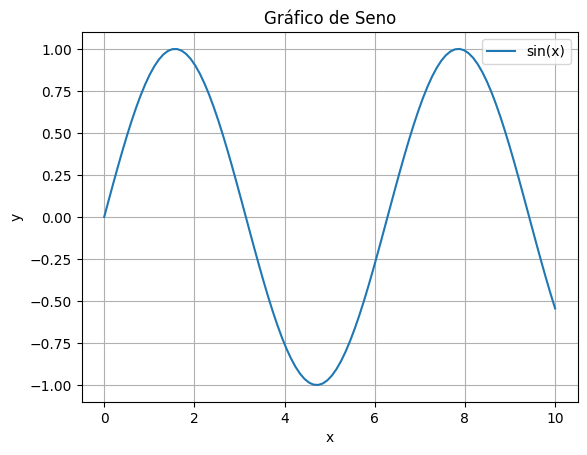

In [5]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, label='sin(x)')
plt.title("Gráfico de Seno")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

> Ejercicio No. 2

In [ ]:
# TODO:
''' 
- Proponga 4 funciones y gráfiquelas en el plano usando plot y scatter.
- Grafique esas mismas 4 funciones como subplots en las configuraciones: (2,2), (4,1) y (1,4).
Hint: Defina el espacio con plt.subplot(), asigne cada gráfica y finalice con plt.show().
- Realice anotaciones en formato LaTeX para las etiquetas de las funciones. 
  (Tenga en cuenta que se deben usar cadenas f'' y r'' para que funcione correctamente)
'''

" \n- Proponga 4 funciones y grafiquelas en en plano con plot y scatter.\n- Grafique esas mismas 4 funciones como subplot (2,2) / (4,1) / (1,4). \nHint: Defina el espacio con  plt.subplot() asigne una grafica y termine con plt.show()\n- Realice anotaciones tipo latex en las etiquetas de las funciones. (tenga en cuenta que es un f'' string y que es un r'' string)\n"

- Si desea tener más control sobre las gráficas de su preferencia puede consultar en la siguiente referencia: [Figuras en matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) o considere utilizar seaborn o plotly. Considerando los siguientes recursos editables: 

<img src="resources_5082025/anatomy.png" alt="recurso" style="display: block; margin: 0 auto;" width="300">


### Generación de gráficas de vectores con quiver()

#### ¿Cómo usar quiver para graficar vectores?

plt.quiver() permite graficar vectores como flechas desde una posición inicial con una dirección y magnitud definidas.

plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue')
- X, Y: Coordenadas del punto de origen del vector (pueden ser escalares o arreglos).

- U, V: Componentes del vector en dirección X e Y (pueden ser escalares o arreglos).

- angles='xy': Interpreta las componentes del vector según el sistema de coordenadas del gráfico.

- scale_units='xy': Usa las unidades reales del gráfico en lugar de unidades normalizadas.

- scale=1: Determina la escala del vector (1 = tamaño real sin escalado).

- color='blue': Define el color del vector.

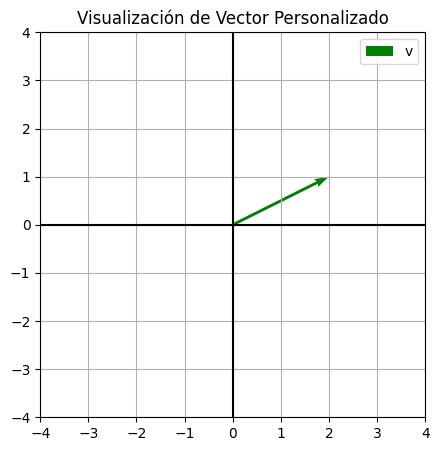

In [7]:
def draw_vector(v, color='blue', label=''):
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)

vec = np.array([2, 1]) 
plt.figure(figsize=(5, 5))
draw_vector(vec, 'green', 'v')
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.gca().set_aspect('equal')
plt.legend()
plt.title("Visualización de Vector Personalizado")
plt.show()

> Ejercicio No. 3

In [ ]:
# TODO:
'''
- Implemente una función que reciba N vectores en dos dimensiones, sume sus componentes, retorne el vector resultante 
  y lo grafique utilizando quiver.
- Tenga en cuenta que puede usar la función: np.sum(vectores, axis=0)
'''

'\nHaga una función que reciba N vectores de dos dimensiones sume sus componentes, me de el vector resultante y lo grafique con quiver.\n- Tenga en cuenta la función: np.sum(vectores, axis=0)\n\n'

### Marcos de referencia simbólicos

In [9]:
t = symbols('t') # variable algebraica del tiempo
theta = dynamicsymbols('theta') # es una función del tiempo theta(t)
N = ReferenceFrame('N') # Sistema de referencia inercial 
A = N.orientnew('A', 'Axis', [theta, N.z]) # Nuevo sistema que rota con respecto a N.z
v = 3 * A.x + 2 * A.y # vector en base A
v.express(N).simplify() # expresamos v en N

> Ejercicio No. 4

In [ ]:
# TODO:
'''
- Cree una función que cambie el eje de rotación con respecto a un sistema inercial dado, dependiendo de la entrada.
- Nótese que la función también debe recibir el vector v, para poder expresarlo en todas las direcciones en R^N.
- Además, debe incluir un parámetro que permita especificar si se desea utilizar un sistema de referencia adicional para realizar otra transformación.
'''

'\nCrea una funcion que cambie el eje de rotación en referencia a un sistema inercial dado dependiendo de la entrada.\n- Notese que esta función debe recibir ademas el vector v para poder expresarlo en todaslas direcciones en R^N\n- Debe tener en cuenta que debe contar con un parametro para establecer si quiere otro sistema de referencia adicional para otra transformación.\n\n'